original: 

+ http://qiita.com/niwasawa/items/42c3ed816ddffc14d770
+ http://qiita.com/niwasawa/items/139311850632a599caa2

In [1]:
require 'numo/narray'
require 'numo/gnuplot'

true

In [2]:
# ステップ関数
def step(x)
  x > 0 # Numo::Bit を返す
end

:step

In [3]:
# シグモイド関数
def sigmoid(x)
  1 / (1 + Numo::NMath.exp(-x)) # Numo::DFloat を返す
end

:sigmoid

In [4]:
# ReLU (Rectified Linear Unit) 関数
def relu(x)
  y = Numo::DFloat[x] # コピー
  y[y < 0] = 0 # 0より小さい値の場合は0を代入する
  y
end

:relu

In [5]:
# データの作成
x = Numo::DFloat.new(100).seq(-5.0, 0.1)
y1 = step(x)
y2 = sigmoid(x)
y3 = relu(x)
nil

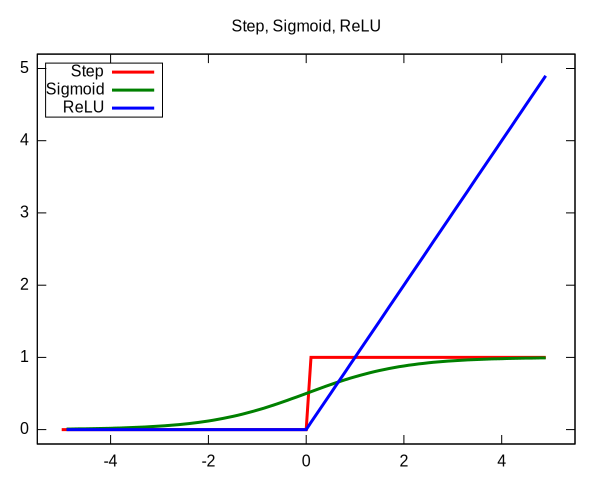

In [6]:
# グラフの描画
g = Numo::noteplot do
  # set term: {png: {size: [480, 640]}} # 画像サイズ
  # set output: 'ruby_graph.png'
  set title: 'Step, Sigmoid, ReLU' # タイトル
  set key: 'box left top'
  set xrange: -5.5...5.5 # x軸の範囲
  set yrange: -0.2...5.2 # y軸の範囲
  set offset: [0, 0, 0, 0]
  plot x, y1, {w: 'lines', lw: 3, title: 'Step'},
       x, y2, {w: 'lines', lw: 3, title: 'Sigmoid'},
       x, y3, {w: 'lines', lw: 3, title: 'ReLU'}
end

In [7]:
# 重みとバイアスの初期化
def init_network()
  network = {}
  network['W1'] = Numo::DFloat[[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]
  network['b1'] = Numo::DFloat[0.1, 0.2, 0.3]
  network['W2'] = Numo::DFloat[[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]
  network['b2'] = Numo::DFloat[0.1, 0.2]
  network['W3'] = Numo::DFloat[[0.1, 0.3], [0.2, 0.4]]
  network['b3'] = Numo::DFloat[0.1, 0.2]
  network
end

:init_network

In [8]:
# 入力信号を出力へと変換
def forword(network, x)
  w1 = network['W1']; w2 = network['W2']; w3 = network['W3']
  b1 = network['b1']; b2 = network['b2']; b3 = network['b3']
  a1 = x.dot(w1) + b1
  z1 = sigmoid(a1)
  a2 = z1.dot(w2) + b2
  z2 = sigmoid(a2)
  a3 = z2.dot(w3) + b3
  identity_function(a3)
end

:forword

In [9]:
# 恒等関数
def identity_function(x)
  x
end

:identity_function

In [10]:
# シグモイド関数
def sigmoid(x)
  1 / (1 + Numo::NMath.exp(-x)) # Numo::DFloat を返す
end

:sigmoid

In [11]:
# 実行
network = init_network()
x = Numo::DFloat[1.0, 0.5] # 入力層
y = forword(network, x)

Numo::DFloat#shape=[2]
[0.316827, 0.696279]